# Bird Species Classification Model #

****In this notebook we will try to examine some bird species visual data which includes 6 unique bird species.Then we will create a model which can easily classify different birds photo.****

## Recognizing our Dataset ## 


In [2]:
import numpy as np
import pandas as pd

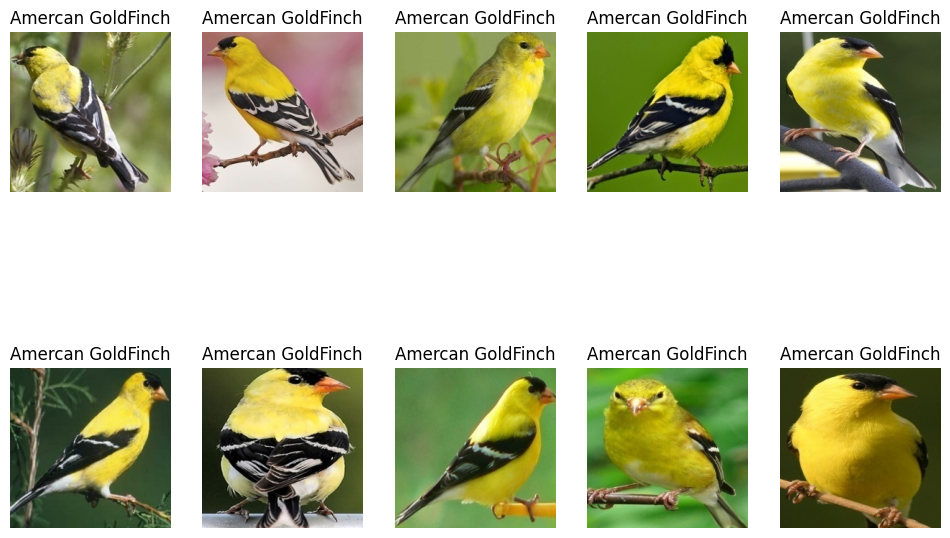

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("Amercan GoldFinch")


plt.show()

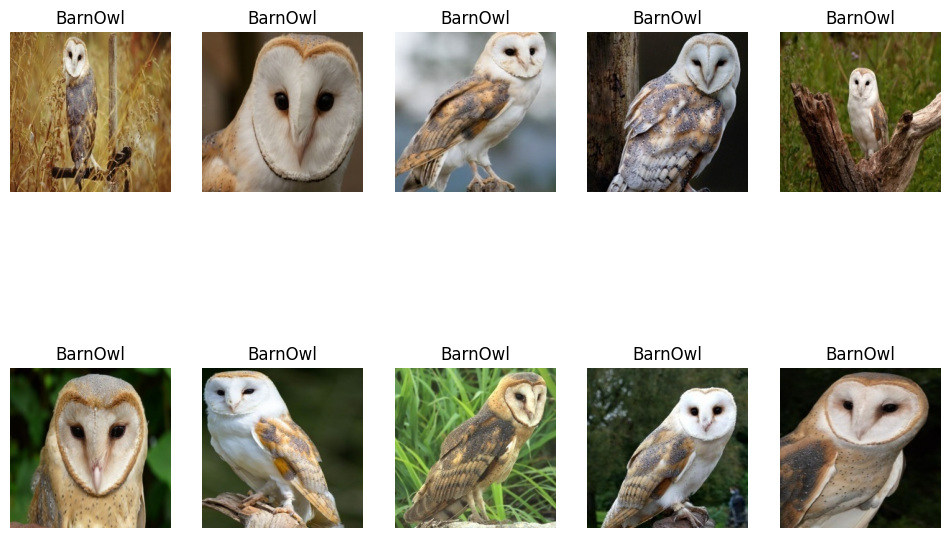

In [4]:
image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/BARN OWL/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("BarnOwl")


plt.show()

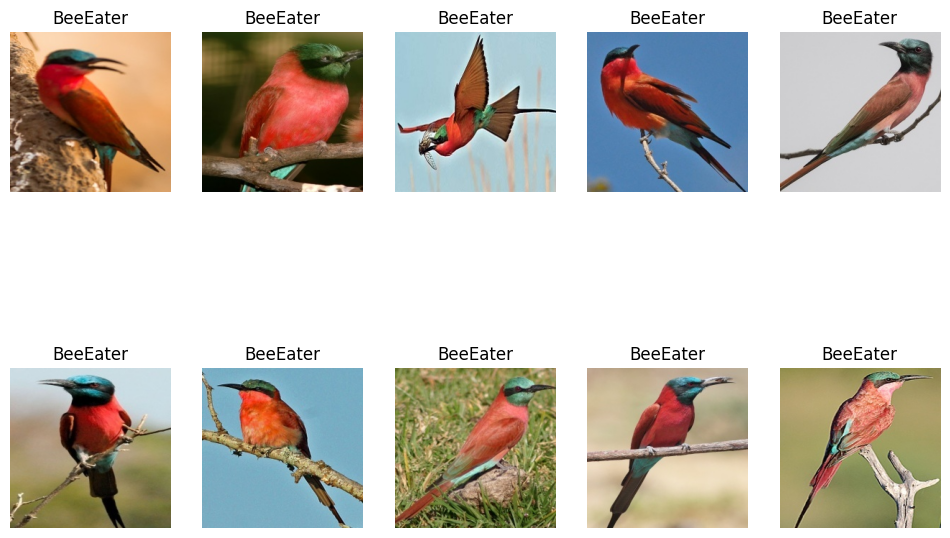

In [5]:
image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("BeeEater")


plt.show()

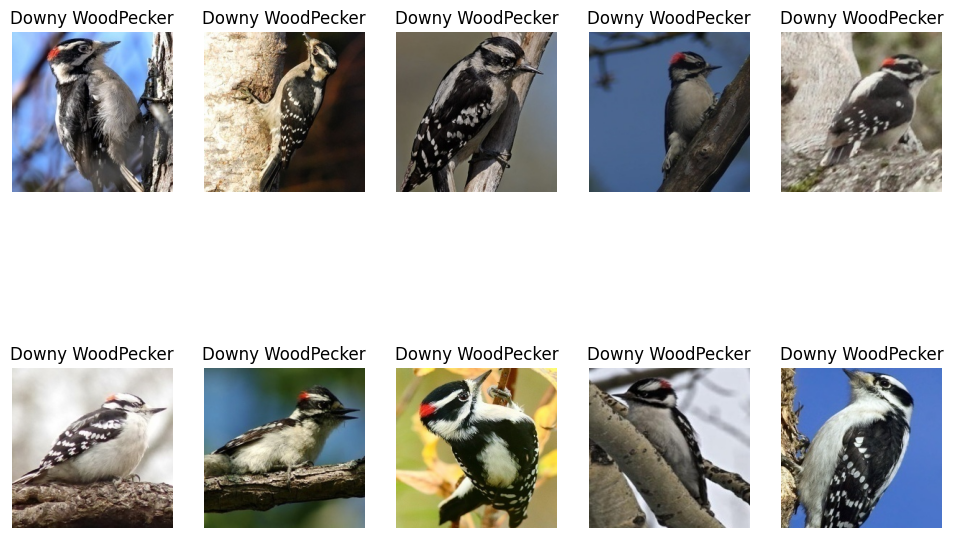

In [6]:
image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/DOWNY WOODPECKER/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("Downy WoodPecker")


plt.show()

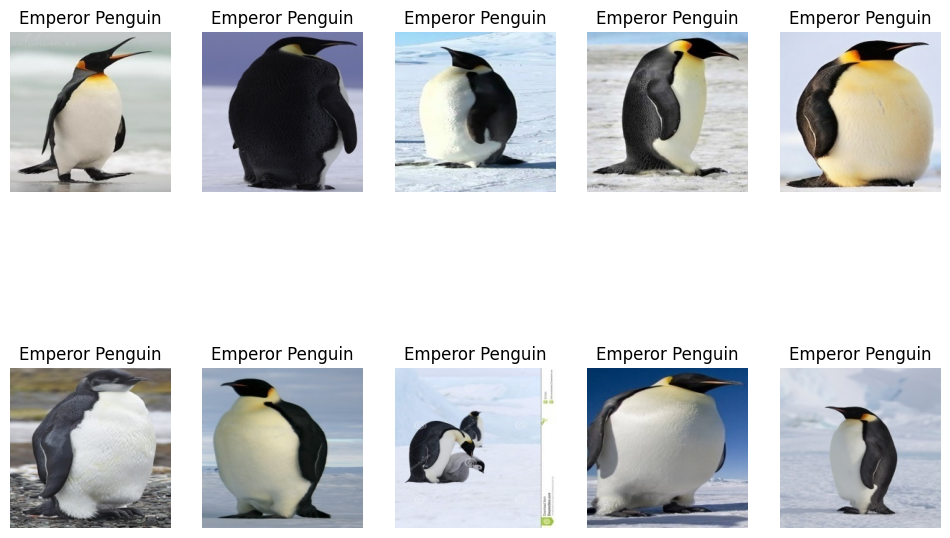

In [7]:
image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/EMPEROR PENGUIN/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("Emperor Penguin")


plt.show()

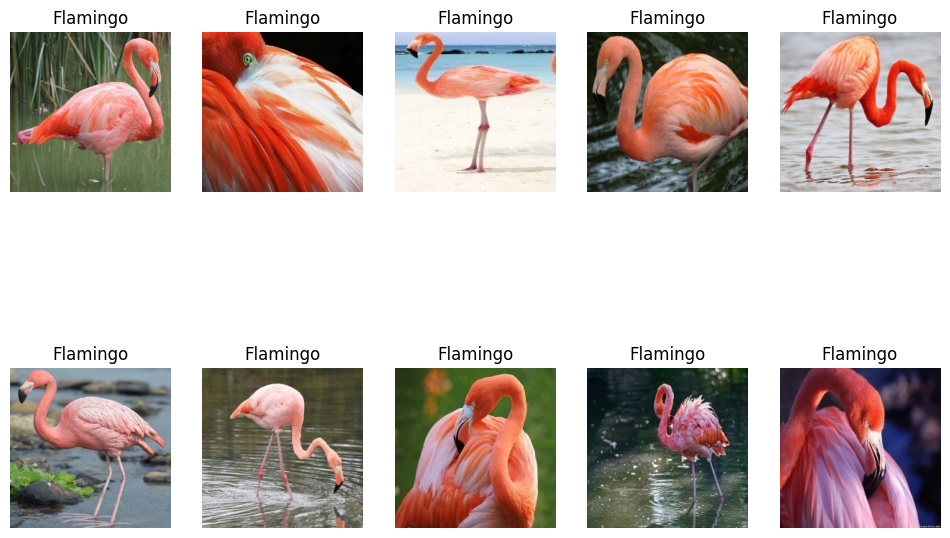

In [8]:
image_paths = glob('/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/FLAMINGO/*.jpg')[:10]
plt.figure(figsize = (12,8))
for i,img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)  
    plt.axis("off")
    plt.title("Flamingo")


plt.show()

## Preparation of the dataset ##


### In this section,I will prepare my data with 2 different method: ###
* Classical, training and validation logic
* Augmented version of the dataset 

****First Method:****
****Now lets by using tensorflow make ready all of these data by splitting them into training set and validation set****


In [9]:
import tensorflow as tf

2025-08-22 14:54:59.145605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755874499.417539      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755874499.496722      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset",
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = (128,128),
    batch_size = 32
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset",
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (128,128),
    batch_size = 32
)

Found 811 files belonging to 6 classes.
Using 649 files for training.
Found 811 files belonging to 6 classes.
Using 162 files for validation.


2025-08-22 14:55:15.671943: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


****Second Method:****
We will use data generator with some parameteres that I tried to get augmented version of the data.


In [16]:
from tensorflow.keras import layers
normalize = tf.keras.Sequential([layers.Rescaling(1./255)])

augmentation  = tf.keras.Sequential([
    layers.RandomRotation(0.15),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
])


train_ds_augmented = train_ds.map(lambda x,y: (augmentation(normalize(x)),y))
val_ds_augmented = validation_ds.map(lambda x,y : (normalize(x),y)) 

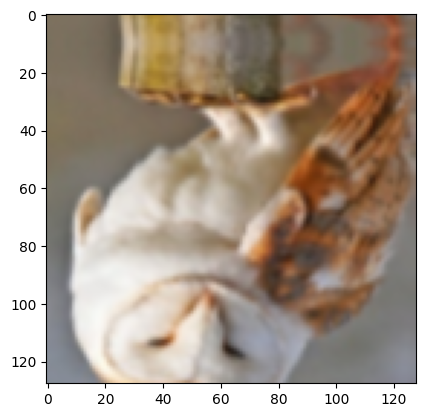

In [18]:
for images,labels in train_ds_augmented:
    img = images[1].numpy()
plt.imshow(img)
plt.show()

# MODELS

## Model Selection
In this part to see the differences between some models in terms of the performance and then to find some other options to improve our solution,I will try 5 different models:

* Basic CNN (for some basic intuitons).
* Basic CNN but including Dropout and Batch Normalization.  
* Deeper CNN. 
* MobilNetV2.
* ResNet50.


##  Basic CNN

In [28]:
Model_1 = tf.keras.models.Sequential([
    layers.Input(shape = (128,128,3)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(6,activation = 'linear')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam(0.001)

Model_1.compile(
    loss = loss,
    optimizer = optimizer,
    metrics = (['accuracy'])
)



Now let's train first model with normal and augmented data. 

In [29]:
history_1_normal = Model_1.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = 10,
    verbose = 1
    
)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 740ms/step - accuracy: 0.2617 - loss: 185.8448 - val_accuracy: 0.5309 - val_loss: 1.2056
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 734ms/step - accuracy: 0.6730 - loss: 0.9232 - val_accuracy: 0.6790 - val_loss: 1.0761
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 742ms/step - accuracy: 0.8918 - loss: 0.3461 - val_accuracy: 0.6667 - val_loss: 1.0326
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 726ms/step - accuracy: 0.9373 - loss: 0.1985 - val_accuracy: 0.5988 - val_loss: 1.8839
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 733ms/step - accuracy: 0.9498 - loss: 0.1620 - val_accuracy: 0.7531 - val_loss: 1.3048
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 733ms/step - accuracy: 0.9861 - loss: 0.0326 - val_accuracy: 0.7037 - val_loss: 1.2705
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 735ms/step - accuracy: 0.9892 - loss: 0.0320 - val_accuracy: 0.6914 - val_loss: 1.6853
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 738ms/step - accuracy: 0.9920 - loss: 0.0174 - val_ac

****We can easily see that we have overfitting problem,lets try to solve this with augmented ones.****


In [33]:
history_1_aug = Model_1.fit(
    train_ds_augmented,
    validation_data = val_ds_augmented,
    epochs = 10,
    verbose = 1 
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 792ms/step - accuracy: 0.4869 - loss: 1.7203 - val_accuracy: 0.5494 - val_loss: 1.4835
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step - accuracy: 0.4246 - loss: 1.5245 - val_accuracy: 0.5741 - val_loss: 1.1740
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 791ms/step - accuracy: 0.5378 - loss: 1.2592 - val_accuracy: 0.6358 - val_loss: 1.0446
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 785ms/step - accuracy: 0.6027 - loss: 1.0541 - val_accuracy: 0.6790 - val_loss: 0.8311
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 790ms/step - accuracy: 0.6839 - loss: 0.8767 - val_accuracy: 0.7099 - val_loss: 0.8311
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 799ms/step - accuracy: 0.7320 - loss: 0.7217 - val_accuracy: 0.7407 - val_loss: 0.7012
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 795ms/step - accuracy: 0.7568 - loss: 0.6811 - val_accuracy: 0.7593 - val_loss: 0.6427
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 792ms/step - accuracy: 0.7461 - loss: 0.6291 - val_accu

###  Now we can see that we barely solved overfitting but our model is still very bad to test.